# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from IPython.display import display
import numpy as np

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


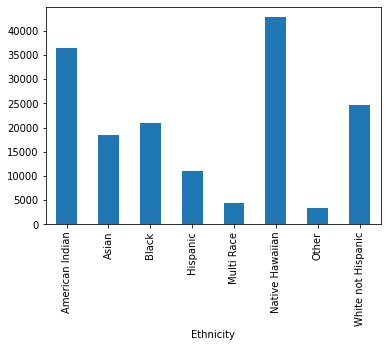

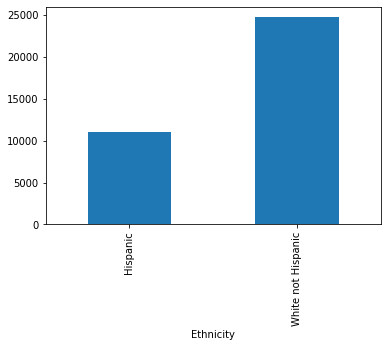

In [15]:
# YOUR CODE HERE

df_exp = pd.read_csv("ca_dds_expenditures.csv")

display(df_exp.head(5))

(df_exp.groupby("Ethnicity").mean()["Expenditures"]).plot(kind="bar") # fix this later .mean()
plt.show()

(df_exp.groupby("Ethnicity").mean()["Expenditures"])[["Hispanic", "White not Hispanic"]].plot(kind="bar")
plt.show()

**YOUR EXPLANATION HERE**

Although we cannot see exact numbers, we do notice that there is a much higher average for the "White not Hispanic" category than the "Hispanic" category. The "White not Hispanic" category seems to average approximately $10,000 in expenditures, while the "Hispanic" category averages approximately $4,000 in expenditures.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

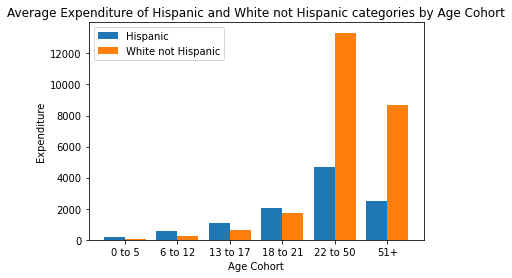

In [3]:
# YOUR CODE HERE

index = ["0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", "51+"]

plt.figure()
hisp_group = df_exp.loc[ df_exp["Ethnicity"] == "Hispanic" ]
blue = (hisp_group.groupby("Age Cohort")["Expenditures"].sum() / len(hisp_group)).reindex(index)

white_nh_group = df_exp.loc[ df_exp["Ethnicity"] == "White not Hispanic" ]
red = (white_nh_group.groupby("Age Cohort")["Expenditures"].sum() / len(white_nh_group)).reindex(index)

width = 0.4
x1 = np.arange(len(np.unique(blue.index)))
x2 = np.arange(len(np.unique(red.index))) + width

plt.bar(x=x1, height=blue, width=width, label="Hispanic")
plt.bar(x=x2, height=red, width=width, label="White not Hispanic")
plt.title("Average Expenditure of Hispanic and White not Hispanic categories by Age Cohort")
plt.xticks(x1 + width / 2, red.index)
plt.legend(loc="best")
plt.xlabel("Age Cohort")
plt.ylabel("Expenditure")
plt.show()

**YOUR EXPLANATION HERE**

These results appear to contradict my answer from question 1 because in age cohorts "0 to 5", "6 to 12", "13 to 17", and "18 to 21", the "Hispanic" category has a higher expenditure than the "White not Hispanic" category. However, we can clearly see that for age cohorts "22 to 50" and "51+", the "White not Hispanic" dominates in expenditure.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [4]:
width = 0.4
index = ["0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", "51+"]

Figure 1.


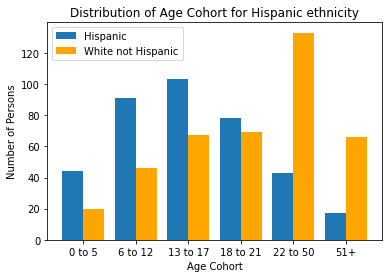

In [5]:
# Figure 1: Distribution of ages in Hispanics and Whites not Hispanic

print("Figure 1.")
plt.figure()
hisp_group = df_exp.loc[ df_exp["Ethnicity"] == "Hispanic" ]
blue = hisp_group["Age Cohort"].value_counts().reindex(index)

white_nh_group = df_exp.loc[ df_exp["Ethnicity"] == "White not Hispanic" ]
red = white_nh_group["Age Cohort"].value_counts().reindex(index)

x1 = np.arange(len(np.unique(blue.index)))
x2 = np.arange(len(np.unique(red.index)))

plt.bar(x=x1, height=blue, width=width, label="Hispanic")
plt.bar(x=x2+width, height=red, width=width, label="White not Hispanic", color="orange")
plt.title("Distribution of Age Cohort for Hispanic ethnicity")
plt.legend(loc="best")
plt.xticks(x1 + width/2, blue.index)
plt.xlabel("Age Cohort")
plt.ylabel("Number of Persons")
plt.show()

In [6]:
width = 0.4
index = ["0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", "51+"]

Figure 2.


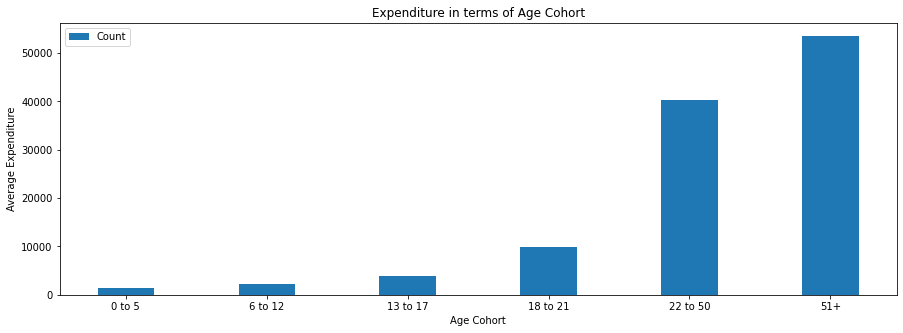

Figure 3.


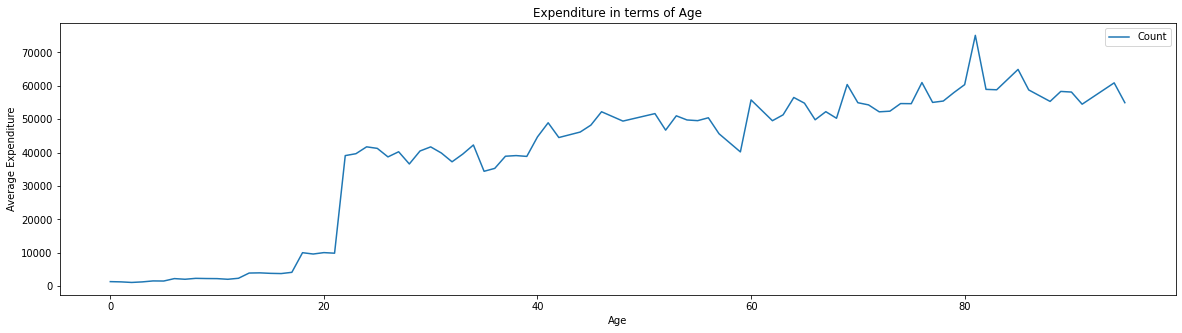

In [7]:
width = 0.4
index_co = ["0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", "51+"]
index_age = np.sort(np.unique(df_exp["Age"]))

# Figure 2: The average expenditure as a function of Age Cohort
print("Figure 2.")
plt.figure(figsize=(15, 5))
heights = df_exp.groupby("Age Cohort")["Expenditures"].mean().reindex(index_co)
plt.bar(x=index_co, height=heights, width=width, label="Count")
plt.title("Expenditure in terms of Age Cohort")
plt.legend(loc="best")
plt.xticks(index_co, heights.index)
plt.xlabel("Age Cohort")
plt.ylabel("Average Expenditure")
plt.show()

# Figure 3: The average expenditure as a function of Age
print("Figure 3.")
plt.figure(figsize=(20, 5))
heights = df_exp.groupby("Age")["Expenditures"].mean()
plt.plot(index_age, heights, label="Count", scalex=True, scaley=True)
plt.title("Expenditure in terms of Age")
plt.legend(loc="best")
plt.xlabel("Age")
plt.ylabel("Average Expenditure")
plt.show()

In [8]:
width = 0.4
index = np.arange(len(np.unique(df_exp["Ethnicity"])))

Figure 4.


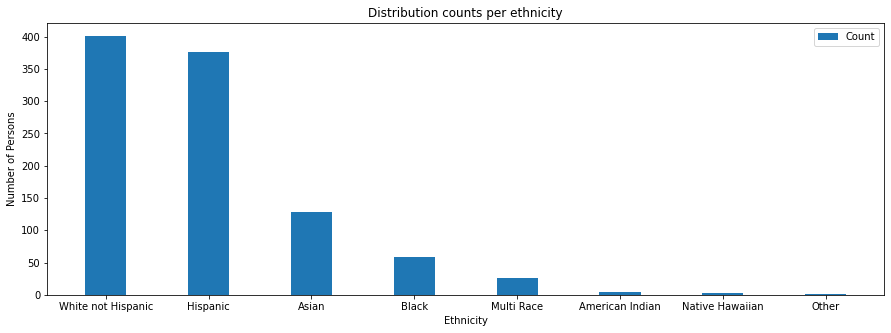

In [9]:
# Figure 4: Distribution of races

print("Figure 4.")
plt.figure(figsize=(15, 5))

heights = df_exp["Ethnicity"].value_counts()

plt.bar(x=index, height=heights, width=width, label="Count")

plt.title("Distribution counts per ethnicity")
plt.legend(loc="best")
plt.xticks(index, heights.index)
plt.xlabel("Ethnicity")
plt.ylabel("Number of Persons")
plt.show()

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

## Narrative Hypothesis

    - From the figures shown above, it seems as though the distribution of the expenditure by age cohort affects the comparison between the expenditures by race/ethnicity.

## Argumentation

### Figure 1

    - We can clearly see in this figure that the number of individuals for age groups 22 to 50 and 51+, the number of individuals that belong to White not Hispanic overwhelmingly excleed the number of individuals that belong to the Hispanic category. At the same time, the age groups for which there is a discrepancy of expenditure between Hispanic and White not Hispanic individuals are 22 to 50 and 51+. Thus we have some evidence (though not completely explanatory), that the average expenditure for ages 22 to 50 and 51+ for Hispanic and White not Hispanic individuals differs so greatly in this sample *because* of the discrepancy between the count of individuals in the White not Hispanic category and the Hispanic category.
    - An important piece of evidence to support this idea is that, in Figure 1., the number of Hispanic individuals outweigh the number of White not Hispanic individuals for age groups 0 to 5, 6 to 12, 13 to 17, and 18 to 21. In these exact age groups, as given by the figure in question 2, expenditure is higher for Hispanic individuals. Thus, it seems as though the number of peoples per age group in an ethnic category will affect the expenditure for that ethnic category.

### Figure 2 and 3

    - From these figures, we can see that the brunt of the expenditure falls upon the age groups 22 to 50 and 51+. What we can learn from this figure is that, as age increases, expenditure for groups of individuals belonging to the age increases.
    - Thus it is expected in Figure 1. that we will see the brunt of the expenditure being spent for groups 22 to 50 and 51+.


## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope and Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab if you want to know your score right away.